##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons 图像：运算

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://tensorflow.google.cn/addons/tutorials/image_ops"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/addons/tutorials/image_ops.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/addons/tutorials/image_ops.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 GitHub 上查看源代码</a></td>
      <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/addons/tutorials/image_ops.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a></td>
</table>

## 概述

此笔记本将演示如何使用 TensorFlow Addons 中的一些图像运算。

下面是此示例中将涉及的图像运算列表：

- `tfa.image.mean_filter2d`

- `tfa.image.rotate`

- `tfa.image.transform`

- `tfa.image.random_hsv_in_yiq`

- `tfa.image.adjust_hsv_in_yiq`

- `tfa.image.dense_image_warp`

- `tfa.image.euclidean_dist_transform`

# 设置

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


# 准备和检查图像

## 下载图像

In [ ]:
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')

40960/39781 [==============================] - 0s 1us/step


## 检查图像

### TensorFlow 图标

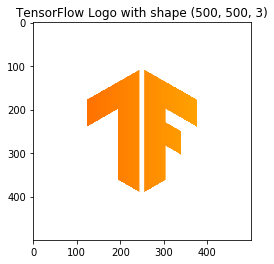

In [ ]:
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])

plt.title("TensorFlow Logo with shape {}".format(img.shape))
_ = plt.imshow(img)

### 制作黑白版本

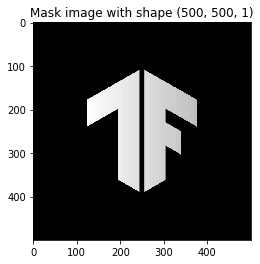

In [ ]:
bw_img = 1.0 - tf.image.rgb_to_grayscale(img)

plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap='gray')

# 使用 tfa.image

## 均值滤波

均值滤波是一种滤波技术，通常用于去除图像或信号中的噪声。其理念是逐个像素遍历图像，然后用相邻像素的平均值替代该像素。

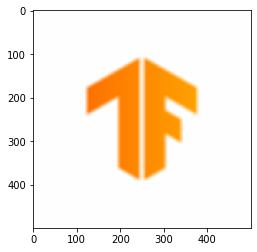

In [ ]:
mean = tfa.image.mean_filter2d(img, filter_shape=11)
_ = plt.imshow(mean)

## 旋转

此运算可将给定图像旋转用户输入的角度（以弧度为单位）。 

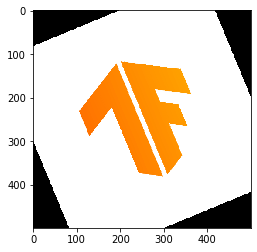

In [ ]:
rotate = tfa.image.rotate(img, tf.constant(np.pi/8))
_ = plt.imshow(rotate)

## 变换

此运算基于用户给定的变换向量来变换给定图像。 

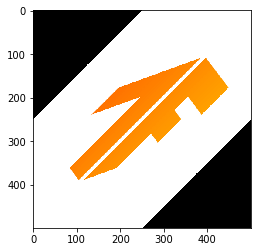

In [ ]:
transform = tfa.image.transform(img, [1.0, 1.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])
_ = plt.imshow(transform)

## YIQ 中的随机 HSV

此运算可将给定 RGB 图像的色标更改为 YIQ，但此处是从给定范围随机选择色度增量和饱和度值。

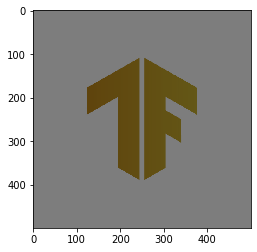

In [ ]:
delta = 0.5
lower_saturation = 0.1
upper_saturation = 0.9
lower_value = 0.2
upper_value = 0.8
rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation, upper_saturation, lower_value, upper_value)
_ = plt.imshow(rand_hsvinyiq)

## 调整 YIQ 中的 HSV

此运算可将给定 RGB 图像的色标更改为 YIQ，但此处不是随机选择，而是由用户输入色度增量和饱和度值。

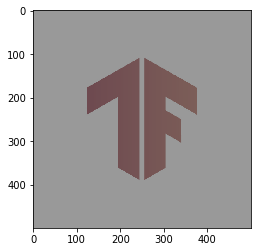

In [ ]:
delta = 0.5
saturation = 0.3
value = 0.6
adj_hsvinyiq = tfa.image.adjust_hsv_in_yiq(img, delta, saturation, value)
_ = plt.imshow(adj_hsvinyiq)

## 密集图像变形

此运算用于由偏移向量的流场指定的任何图像的非线性变形（例如，此处使用随机值）。 

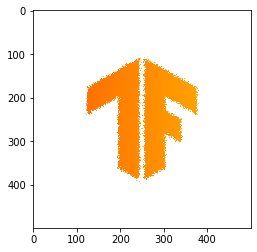

In [ ]:
input_img = tf.image.convert_image_dtype(tf.expand_dims(img, 0), tf.dtypes.float32)

flow_shape = [1, input_img.shape[1], input_img.shape[2], 2]
init_flows = np.float32(np.random.normal(size=flow_shape) * 2.0)
dense_img_warp = tfa.image.dense_image_warp(input_img, init_flows)
dense_img_warp = tf.squeeze(dense_img_warp, 0)
_ = plt.imshow(dense_img_warp)

## 欧氏距离变换

此运算可将像素值更新为从前景像素到背景像素的欧氏距离。

- 注：它仅获取二进制图像并生成变换后的图像。如果指定不同的图像，将产生具有单一值的图像

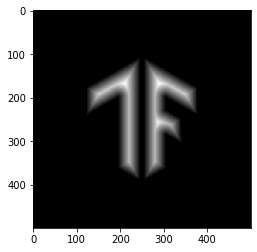

In [ ]:
gray = tf.image.convert_image_dtype(bw_img,tf.uint8)
# The op expects a batch of images, so add a batch dimension
gray = tf.expand_dims(gray, 0)
eucid = tfa.image.euclidean_dist_transform(gray)
eucid = tf.squeeze(eucid, (0, -1))
_ = plt.imshow(eucid, cmap='gray')